In [7]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import (
    plot_histogram,
    plot_bloch_vector,
    plot_bloch_multivector,
)
from math import sqrt, pi
from qiskit import execute, IBMQ
from pprint import pprint
from qiskit.providers.aer import QasmSimulator


In [4]:
qc = QuantumCircuit(5, 5)
qc.h(0)
qc.h(4)
qc.cx(0, 2)
qc.cx(0, 3)
qc.cx(0, 4)
qc.cx(4, 2)
for i in range(5):
    qc.measure(i, i)

qc.draw()


┌───┐                          ┌─┐      
q_0: ┤ H ├─────■────■────■──────────┤M├──────
     └───┘┌─┐  │    │    │          └╥┘      
q_1: ─────┤M├──┼────┼────┼───────────╫───────
          └╥┘┌─┴─┐  │    │     ┌───┐ ║ ┌─┐   
q_2: ──────╫─┤ X ├──┼────┼─────┤ X ├─╫─┤M├───
           ║ └───┘┌─┴─┐  │  ┌─┐└─┬─┘ ║ └╥┘   
q_3: ──────╫──────┤ X ├──┼──┤M├──┼───╫──╫────
     ┌───┐ ║      └───┘┌─┴─┐└╥┘  │   ║  ║ ┌─┐
q_4: ┤ H ├─╫───────────┤ X ├─╫───■───╫──╫─┤M├
     └───┘ ║           └───┘ ║       ║  ║ └╥┘
c: 5/══════╩═════════════════╩═══════╩══╩══╩═
           1                 3       0  2  4

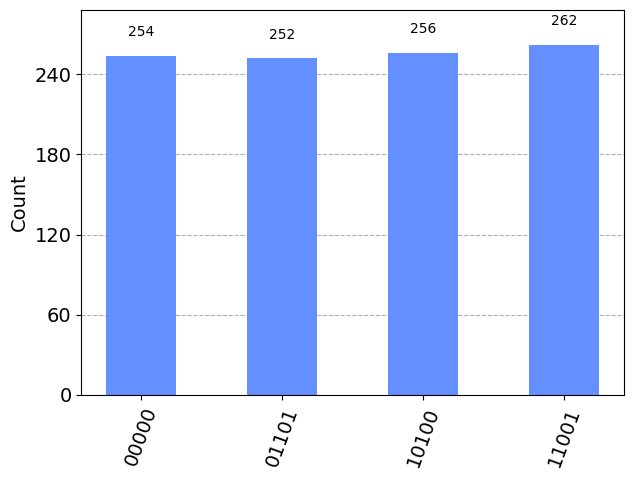

In [9]:
backend1 = QasmSimulator()
job1 = backend1.run(qc)
result1 = job1.result()
counts1 = result1.get_counts()
plot_histogram(counts1)


In [10]:
provider = IBMQ.load_account()
backend2 = provider.get_backend("ibm_kyoto")
job2 = execute(qc, backend=backend2)
job2.job_id()
result2 = job2.result()
counts2 = result2.get_counts()
plot_histogram(counts2)


C:\Users\alaga\AppData\Local\Temp\ipykernel_1636\1504136728.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  provider = IBMQ.load_account()
C:\Users\alaga\AppData\Local\Temp\ipykernel_1636\1504136728.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()
ibmqjob._wait_for_completion:ERROR:2023-12-01 18:57:55,500: Maximum retries exceeded:

IBMQJobApiError: 'Error checking job status due to a network error: "HTTPSConnectionPool(host=\'api.quantum.ibm.com\', port=443): Max retries exceeded with url: /api/Network/ibm-q/Groups/open/Projects/main/Jobs/cnmz6n2pzmsg008ww64g/status/v/1 (Caused by NewConnectionError(\'<urllib3.connection.HTTPSConnection object at 0x0000020117EB39D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed\'))"'